# Mudcard
- **For missing data of a continuous feature, can we get mean & variance of existing data and generate random values based on Normal(mean, variance) to fill in each missing value?**
    - If the distribution of the feature is Gaussian, that would preserve the statistical properties of the feature
    - But you still impute, you fill up the missing values with random numbers which is not great
    - Think of a medical example where some test results (like some blood values) are missing. Do you think it's a good idea to replace missing test results with random numbers?
    - You have no way to verify if the guesses are correct
    - The reason why the values are missing could be important and some ML techniques can extract info from the missingness patterns.
    - It's usually better just to leave the missing values as is and use ML techniques that can deal with them as is.
- **what are we supposed to do when continuous variables are missing data points if the sklearn's simple imputer is a "bad idea"**
    - As I said at the end of the class, we wil lcover three advanced techniques later in the term that can deal with missing values as is:
    - multivariate imputation
    - XGBoost
    - reduced features method
- **Could we ever change NA values to be zero? What contexts would that be useful for?**
    - there might be some contexts where this could be useful but I'd be very careful about applying it.

## Evaluation metrics in supervised ML, part 1, classification
By the end of this lecture, you will be able to
- Describe the terms in the confusion matrix
- Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)
- Choose a metric most appropriate for your problem


## The supervised ML pipeline
The goal: Use the training data (X and y) to develop a <font color='red'>model</font> which can <font color='red'>accurately</font> predict the target variable (y_new') for previously unseen data (X_new).

**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors
   - do as much EDA as you can!
    
**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
<span style="background-color: #FFFF00">**4. Choose an evaluation metric**: depends on the priorities of the stakeholders</span>
   - often requires quite a bit of thinking and ethical considerations
     
**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models
   - start with simple models like linear or logistic regression
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

## Let's start
- decide what metric we will use to evaluate the supervised ML model 
   - this is necessary even before we train the model
   - we need to know what single number metric we will use to compare models and to select the best one
- sklearn classifiers have two methods to return predictions
   - .predict_proba which returns the probability that the point belongs to each class with shape (n_samples, n_classes)
   - .predict which returns the predicted class for each point with shape (n_samples)

### .predict_proba vs. .predict

`y_true = [1 0 1 1 0] # the true labels`

`pred_probs = 
[[0.02796171 0.97203829]
 [0.89682444 0.10317556]
 [0.50104129 0.49895871]
 [0.13713222 0.86286778]
 [0.95707434 0.04292566]] # predicted probabilities show the model's confidence`
 
 `y_pred = [1 0 0 1 0] # predicted class`
 - pred_probs
    - first column is the probability that the point belongs to class 0
    - second column is the probability that the point belings to class 1
    - the rows sum to 1
 - y_pred
    - 0 if class 0 probability is equal or larger than 50% (or equivalently if class 1 probability is less than 50%)
    - 1 if class 0 probability is less than 50% (or equivalently of class 1 probability is equal or larger than 50%)

### How to transform predicted probabilities to predicted class?

In [1]:
import numpy as np
y_true = np.array([0,0,1,0,1,1,0,1,0,1]) # the true classification labels of the dataset
# pred_probs_class1 is the second column of pred_probs
pred_probs_class1 = np.array([0.3, 0.7,  0.55, 0.12, 0.45, 0.89, 0.41, 0.02, 0.29, 0.85])
p_crit =  0.5

# If predicted probability is < p_crit (by default 0.5), predicted class is 0, otherwise it is 1.
y_pred = np.zeros(len(pred_probs_class1),dtype=int)
y_pred[pred_probs_class1 <= p_crit] = 0
y_pred[pred_probs_class1 > p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels

[0 0 1 0 1 1 0 1 0 1]
[0 1 1 0 0 1 0 0 0 1]


For now, we focus on evaluation metrics applicable to predicted classes!

We work with y_true and y_pred arrays.

Next, we will work with metrics applicable to pred_probs and regression problems.

## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Describe the terms in the confusion matrix**
- <font color='LIGHTGRAY'>Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)</font>
- <font color='LIGHTGRAY'>Choose a metric most appropriate for your problem</font>


## The confusion matrix

`y_true = [0, 0, 1, 0, 1, 1, 0, 1, 0, 1] # the true classification labels of the dataset`

`y_pred = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1] # the predicted classification labels`

Let's count how many points we have in four categories:

- true label is 0, predicted label is 0 - **True Negatives**
- true label is 1, predicted label is 1 - **True Positives**
- true label is 0, predicted label is 1 - **False Positive**
- true label is 1, predicted label is 0 - **False Negative**

Generally, the confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.

## Back to our example:

`y_true = [0, 0, 1, 0, 1, 1, 0, 1, 0, 1] # the true classification labels of the dataset`

`y_pred = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1] # the predicted classification labels`


<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN): 4</b></td>
        <td><b>False Positive (FP): 1</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN): 2</b></td>
        <td><b>True Positive (TP): 3</b></td>
    </tr>
</table>


## In sklearn

In [2]:
from sklearn.metrics import confusion_matrix

y_true = [0,0,1,0,1,1,0,1,0,1]
y_pred = [0,1,1,0,0,1,0,0,0,1]
print(confusion_matrix(y_true,y_pred))

[[4 1]
 [2 3]]


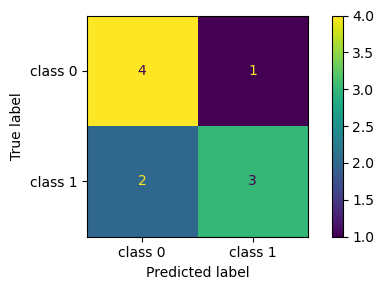

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay
# check out also https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.show()


## Quiz 1

Calculate what fraction of the data points are correctly classified in the example below. Visualize the confusion matrix (not part of the quiz)!

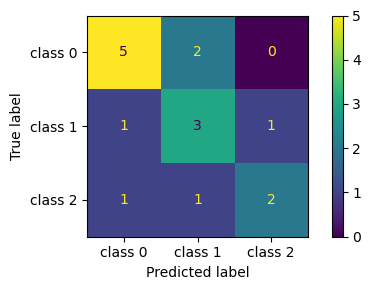

In [9]:
y_true = np.array([0,0,2,1,1,0,2,2,2,0,1,1,0,0,0,1])
y_pred = np.array([0,1,0,1,0,0,2,2,1,0,1,1,0,0,1,2])
cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1', 'class 2'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.show()

## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe the terms in the confusion matrix</font>
- **Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)**
- <font color='LIGHTGRAY'>Choose a metric most appropriate for your problem</font>


## Metrics derived from $C$
$C$ contains $n_{classes}^2$ elements but we need a single number metric to easily compare various models.

For two classes:


<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>


Some single number metrics derived from $C$:
- accuracy: fraction of data points correctly classified
   - $a = \sum_i C_{i,i} / \sum C$ = (TP + TN) / (TP + TN + FP + FN)
- recall: what fraction of the condition positive samples are true positives?
   - it measures the ability of the classifier to identify all positive samples
   - in binary classification: R = TP / (TP + FN)
- precision: what fraction of the predicted positive points are true positives?
   - it measures the ability of the classifier to not predict a negative sample to be positive
   - in binary classification: P = TP / (TP + FP)

<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>

A = (TP + TN) / (TP + TN + FP + FN) 

R = TP / (TP + FN) = TP / CP

P = TP / (TP + FP) = TP / PP

### The f_beta score
Weighted harmonic mean of P and R:
### <center> $f_{\beta} = (1 + \beta^2) \frac{P R}{\beta^2 P + R}$ </center>

If $\beta = 1$, we have the f1 score:
### <center> $f_{1} = 2 \frac{P R}{P + R}$ </center>

If $\beta < 1$, more weight to precision.

If $\beta > 1$, more weight to recall.



### The scores are a function of p_crit

In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score

y_true = np.array([0,0,1,0,1,1,0,1,0,1]) # the true classification labels of the dataset
y_pred_proba = np.array([0.3, 0.7,  0.55, 0.12, 0.45, 0.89, 0.41, 0.02, 0.29, 0.85])

p_crit = 0.75

y_pred = np.zeros(len(y_pred_proba),dtype=int)
y_pred[y_pred_proba <= p_crit] = 0
y_pred[y_pred_proba > p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels
print('accuracy',accuracy_score(y_true,y_pred))
print('recall',recall_score(y_true,y_pred))
print('precision',precision_score(y_true,y_pred))
print('f1',fbeta_score(y_true,y_pred,beta=1))

[0 0 1 0 1 1 0 1 0 1]
[0 0 0 0 0 1 0 0 0 1]
accuracy 0.7
recall 0.4
precision 1.0
f1 0.5714285714285714


## Quiz 2
Given the true and predicted labels, what are the accuracy, recall, precision, and f1 scores? 

Do not use sklearn to answer the question! First construct the confusion matrix and then calculate the scores by hand!

In [6]:
y_true = [0,0,0,1,1,1,0,0]
y_pred = [0,1,0,1,1,0,0,0]



## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe the terms in the confusion matrix</font>
- <font color='LIGHTGRAY'>Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)</font>
- **Choose a metric most appropriate for your problem**


## How should you choose a metric?

- What are the terms in the confusion matrix that you most (or least) care about?
    - In an imbalanced dataset, TNs are large so you should use a metric that doesn't include TN
    - no accuracy
    - f score is usually preferred if your dataset is imbalanced
- Will we act (intervene/apply treatment) on the model's prediction?
    - Is it cheap to act? (e.g., mass email)
       - we want to capture the largest fraction of the condition positive samples even if FPs will be large as a result
       - recall or fbeta with beta > 1 (f1.5 or f2 are often used)
    - Is it expensive to act? Do we have limited resources? Or treatment/action is costly?
       - we want to make sure that the resources are allocated the best way possible
       - want to make sure that a large fraction of the predicted positives are  true positives
       - precision or fbeta with beta < 1 (f0.5 is often used)

## Mudcard